## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать в систему Anytask (более подробную информацию можно найти на странице курса). 

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели или максимальная глубина решающего дерева). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Задание

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Более подробно про данные можно почитать на странице первого конкурсного [соревнования](https://www.kaggle.com/t/55797188147b4b519023923730aa5545). Целевой признак записан в переменной radiant_win. 

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv')
gold_data = pd.read_csv('gold.csv')
lh_data = pd.read_csv('lh.csv')

In [2]:
train_data.head(5)

,mid,patch,radiant_win
0,48434,25,True
1,37074,18,False
2,5018,8,False
3,38479,18,True
4,69147,41,False


In [3]:
gold_data.head(5)

,mid,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,120,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,180,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,240,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,300,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
lh_data.head(5)

,mid,time,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,120,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,180,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,240,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,300,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**(1 балл) Задание 1.** Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками из *gold.csv*.
 - Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv*. В этом вам могут помочь [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) по индексу *mid*.
 - Постройте для команд radiant (player_{0,1,2,3,4}) и dire (player_{5,6,7,8,9}) значения суммы, максимума и минимума золота и ласт хитов на 600 секунде.

In [5]:
# Удаление объектов с пропусками
gold_data_filter = gold_data[gold_data.player_0 != -1]
lh_data_filter = lh_data[lh_data.player_0 != -1]

In [6]:
print('gold data')
print(gold_data_filter.head(5))
print('________________________')
print('lh data')
print(lh_data_filter.head(5))

gold data
        mid  time  player_0  player_1  player_2  player_3  player_4  player_5  \
80040  8004    60       148       100       100       146       200       140   
80041  8004   120       561       629       200       375       606       363   
80042  8004   180       807       839       459       638      1109       507   
80043  8004   240      1268      1026       682      1028      1373       607   
80044  8004   300      1970      1216       782      1525      1635       707   

       player_6  player_7  player_8  player_9  
80040       121       200       100       186  
80041       404       428       367       286  
80042       671       570       631       471  
80043       992       756       854       571  
80044      1307       856       954       712  
________________________
lh data
        mid  time  player_0  player_1  player_2  player_3  player_4  player_5  \
80040  8004    60         1         0         0         1         0         1   
80041  8004   120   

In [7]:
# Взять данные по 600 секунде и подклеить их к train_data
gold_data_filter_on_600_sec = gold_data_filter[gold_data_filter.time == 600]
lh_data_filter_on_600_sec = lh_data_filter[lh_data_filter.time == 600]

In [8]:
train_data_on_600_sec = train_data.join(gold_data_filter_on_600_sec.set_index('mid'), on='mid', how='inner', rsuffix='_gold')

In [9]:
train_data_on_600_sec = train_data_on_600_sec.join(lh_data_filter_on_600_sec.set_index('mid'), on='mid', how='inner', rsuffix='_lh')

In [10]:
train_data_on_600_sec

,mid,patch,radiant_win,time,player_0,player_1,player_2,player_3,player_4,player_5,...,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
0,48434,25,True,600,1372,3120,3706,1449,2009,1014,...,2,51,61,4,25,2,44,52,0,10
1,37074,18,False,600,2014,1393,1515,4106,3579,3349,...,9,6,12,60,40,55,69,17,42,8
4,69147,41,False,600,1134,3570,3213,2301,1616,2225,...,0,75,53,31,10,14,67,44,44,7
5,33300,16,True,600,4143,2921,2443,4002,1868,2635,...,52,31,10,48,6,31,4,46,7,92
7,65872,40,False,600,1881,1644,5251,4487,2861,6982,...,6,5,97,56,34,94,62,26,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40728,41993,19,True,600,5722,4067,1476,2663,4360,2487,...,61,67,1,5,41,43,13,37,47,17
40730,45891,24,False,600,1979,1659,3186,3508,2874,1626,...,19,11,55,63,30,13,50,2,57,29
40731,42613,20,False,600,1432,3006,2961,1481,2653,2235,...,6,48,46,1,32,11,9,52,51,49
40732,43567,21,False,600,1770,2337,2933,2933,3743,3060,...,12,11,50,46,43,46,0,12,67,62


In [11]:
train_data_on_600_sec = train_data_on_600_sec.rename(columns={'player_0': 'player_0_gold', 'player_1': 'player_1_gold', 'player_2': 'player_2_gold',
                           'player_3': 'player_3_gold', 'player_4': 'player_4_gold', 'player_5': 'player_5_gold',
                           'player_6': 'player_6_gold', 'player_7': 'player_7_gold', 'player_8': 'player_8_gold',
                           'player_9': 'player_9_gold'})

In [12]:
train_data_on_600_sec

,mid,patch,radiant_win,time,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,...,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
0,48434,25,True,600,1372,3120,3706,1449,2009,1014,...,2,51,61,4,25,2,44,52,0,10
1,37074,18,False,600,2014,1393,1515,4106,3579,3349,...,9,6,12,60,40,55,69,17,42,8
4,69147,41,False,600,1134,3570,3213,2301,1616,2225,...,0,75,53,31,10,14,67,44,44,7
5,33300,16,True,600,4143,2921,2443,4002,1868,2635,...,52,31,10,48,6,31,4,46,7,92
7,65872,40,False,600,1881,1644,5251,4487,2861,6982,...,6,5,97,56,34,94,62,26,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40728,41993,19,True,600,5722,4067,1476,2663,4360,2487,...,61,67,1,5,41,43,13,37,47,17
40730,45891,24,False,600,1979,1659,3186,3508,2874,1626,...,19,11,55,63,30,13,50,2,57,29
40731,42613,20,False,600,1432,3006,2961,1481,2653,2235,...,6,48,46,1,32,11,9,52,51,49
40732,43567,21,False,600,1770,2337,2933,2933,3743,3060,...,12,11,50,46,43,46,0,12,67,62


In [13]:
# Построение для команд radiant (player_{0,1,2,3,4}) и dire (player_{5,6,7,8,9})
# значения суммы, максимума и минимума золота и ласт хитов на 600 секунде

# для команды radiant
radiant_data_gold = train_data_on_600_sec.iloc[:, 4:9]
radiant_data_lh = train_data_on_600_sec.iloc[:, -10:-5]
# сумма золота
radiant_gold_sum_data = radiant_data_gold.sum(1)
# максимум золота
radiant_gold_max = radiant_data_gold.max(1)
# минимум золота
radiant_gold_min = radiant_data_gold.min(1)

# сумма ласт хитов
radiant_lh_sum = radiant_data_lh.sum(1)
# максимум ласт хитов
radiant_lh_max = radiant_data_lh.max(1)
#минимум ласт хитов
radiant_lh_min = radiant_data_lh.min(1)

# для команды dire
dire_data_gold = train_data_on_600_sec.iloc[:, 9:14]
dire_data_lh = train_data_on_600_sec.iloc[:, -5:]
# сумма золота
dire_gold_sum_data = dire_data_gold.sum(1)
# максимум золота
dire_gold_max = dire_data_gold.max(1)
# минимум золота
dire_gold_min = dire_data_gold.min(1)

# сумма ласт хитов
dire_lh_sum = dire_data_lh.sum(1)
# максимум ласт хитов
dire_lh_max = dire_data_lh.max(1)
#минимум ласт хитов
dire_lh_min = dire_data_lh.min(1)

### (7 баллов) Обучение классификаторов на вещественных признаках

В данном разделе будет необходимо работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)

**(1.5 балла) Задание 2.** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. 

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [14]:
train_data_update = pd.DataFrame()

train_data_update['mid'] = train_data_on_600_sec['mid']
train_data_update['radiant_win'] = train_data_on_600_sec['radiant_win']
train_data_update['time'] = train_data_on_600_sec['time']
train_data_update['patch'] = train_data_on_600_sec['patch']

train_data_update['radiant_gold_sum'] = radiant_gold_sum_data
train_data_update['radiant_gold_min'] = radiant_gold_min
train_data_update['radiant_gold_max'] = radiant_gold_max

train_data_update['dire_gold_sum'] = dire_gold_sum_data
train_data_update['dire_gold_min'] = dire_gold_min
train_data_update['dire_gold_max'] = dire_gold_max

train_data_update['radiant_lh_sum'] = radiant_lh_sum
train_data_update['radiant_lh_min'] = radiant_lh_min
train_data_update['radiant_lh_max'] = radiant_lh_max

train_data_update['dire_lh_sum'] = dire_lh_sum
train_data_update['dire_lh_min'] = dire_lh_min
train_data_update['dire_lh_max'] = dire_lh_max

In [15]:
train_data_update

,mid,radiant_win,time,patch,radiant_gold_sum,radiant_gold_min,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,radiant_lh_sum,radiant_lh_min,radiant_lh_max,dire_lh_sum,dire_lh_min,dire_lh_max
0,48434,True,600,25,11656,1372,3706,9728,1014,3024,143,2,61,108,0,52
1,37074,False,600,18,12607,1393,4106,14149,1583,3884,127,6,60,191,8,69
4,69147,False,600,41,11834,1134,3570,14635,1807,3825,169,0,75,176,7,67
5,33300,True,600,16,15377,1868,4143,14512,1663,4692,147,6,52,180,4,92
7,65872,False,600,40,16124,1644,5251,15630,1339,6982,198,5,97,191,2,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40728,41993,True,600,19,18288,1476,5722,13432,1849,4197,175,1,67,157,13,47
40730,45891,False,600,24,13206,1659,3508,13419,1626,3988,178,11,63,151,2,57
40731,42613,False,600,20,11533,1432,3006,15189,2015,3737,133,1,48,172,9,52
40732,43567,False,600,21,13716,1770,3743,15139,1524,3993,162,11,50,187,0,67


In [16]:
train_data_update.iloc[:, 3:]

,patch,radiant_gold_sum,radiant_gold_min,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,radiant_lh_sum,radiant_lh_min,radiant_lh_max,dire_lh_sum,dire_lh_min,dire_lh_max
0,25,11656,1372,3706,9728,1014,3024,143,2,61,108,0,52
1,18,12607,1393,4106,14149,1583,3884,127,6,60,191,8,69
4,41,11834,1134,3570,14635,1807,3825,169,0,75,176,7,67
5,16,15377,1868,4143,14512,1663,4692,147,6,52,180,4,92
7,40,16124,1644,5251,15630,1339,6982,198,5,97,191,2,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40728,19,18288,1476,5722,13432,1849,4197,175,1,67,157,13,47
40730,24,13206,1659,3508,13419,1626,3988,178,11,63,151,2,57
40731,20,11533,1432,3006,15189,2015,3737,133,1,48,172,9,52
40732,21,13716,1770,3743,15139,1524,3993,162,11,50,187,0,67


In [17]:
import numpy as np
features = train_data_update.iloc[:, 3:].values
target = [int(val) for val in train_data_update['radiant_win']]

In [18]:
from sklearn.model_selection import GridSearchCV

###### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
neighbors = list(range(1,40))
param_grid = {'n_neighbors': neighbors}
knn1 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn1.fit(features, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
best_neighbors = knn1.best_params_['n_neighbors']
best_neighbors

34

In [22]:
knn_cv_results_1 = knn1.cv_results_
knn_best_index_1 = knn1.best_index_
print(knn_cv_results_1)

{'mean_fit_time': array([0.03594637, 0.03231401, 0.03210816, 0.02816005, 0.02517157,
       0.02645226, 0.03888445, 0.02729855, 0.03265224, 0.02764783,
       0.02792487, 0.0270319 , 0.02700729, 0.02815657, 0.02718105,
       0.02786741, 0.02949862, 0.02918115, 0.02733698, 0.02858725,
       0.02878222, 0.02799463, 0.02689767, 0.03034554, 0.02823372,
       0.0282795 , 0.03089933, 0.02836332, 0.02878833, 0.02775617,
       0.02920923, 0.02845168, 0.0283349 , 0.02854972, 0.02737346,
       0.02846503, 0.02885742, 0.02940817, 0.0271482 ]), 'std_fit_time': array([1.16762674e-02, 5.18341459e-03, 5.02273137e-03, 2.32355295e-03,
       2.18709106e-03, 5.33186690e-03, 1.89197812e-02, 1.21022150e-03,
       5.48260560e-03, 1.09225332e-03, 1.34699616e-03, 1.58167330e-03,
       1.10619600e-03, 1.50080900e-03, 9.87089838e-04, 6.83193314e-04,
       2.86124038e-03, 1.27789890e-03, 1.17153285e-03, 2.88660418e-03,
       1.66371118e-03, 1.50763144e-03, 7.10647376e-04, 3.06966195e-03,
       1.47097

In [23]:
knn_cv_scores_1 = [knn_cv_results_1['split0_test_score'][knn_best_index_1], knn_cv_results_1['split1_test_score'][knn_best_index_1], 
knn_cv_results_1['split2_test_score'][knn_best_index_1], knn_cv_results_1['split3_test_score'][knn_best_index_1],
knn_cv_results_1['split4_test_score'][knn_best_index_1]]

print(knn1.best_score_)

0.6886332469907055


In [24]:
knn_cv_scores_1

[0.6905351361645401,
 0.6867263378404114,
 0.6749190630356122,
 0.696,
 0.6949895218136788]

###### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
depths = list(range(1,16))
param_grid = {'max_depth': depths}
decision_tree_clf_1 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
decision_tree_clf_1.fit(features, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
     

In [27]:
decision_tree_clf_1.best_params_, decision_tree_clf_1.best_score_

({'max_depth': 6}, 0.6900426634161206)

In [28]:
dt_cv_results_1 = decision_tree_clf_1.cv_results_
dt_best_index_1 = decision_tree_clf_1.best_index_

In [29]:
dt_cv_scores_1 = [dt_cv_results_1['split0_test_score'][dt_best_index_1], dt_cv_results_1['split1_test_score'][dt_best_index_1], 
                    dt_cv_results_1['split2_test_score'][dt_best_index_1], dt_cv_results_1['split3_test_score'][dt_best_index_1],
                    dt_cv_results_1['split4_test_score'][dt_best_index_1]]

###### SGD Linear Classifier

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'loss': losses}
sgd_clf_1 = GridSearchCV(SGDClassifier(), param_grid, cv=5)
sgd_clf_1.fit(features, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron']},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [32]:
sgd_clf_1.best_params_, sgd_clf_1.best_score_

({'loss': 'perceptron'}, 0.6321042206308091)

In [33]:
sgd_cv_results_1 = sgd_clf_1.cv_results_
sgd_best_index_1 = sgd_clf_1.best_index_

In [34]:
sgd_cv_scores_1 = [sgd_cv_results_1['split0_test_score'][sgd_best_index_1], sgd_cv_results_1['split1_test_score'][sgd_best_index_1], 
                    sgd_cv_results_1['split2_test_score'][sgd_best_index_1], sgd_cv_results_1['split3_test_score'][sgd_best_index_1],
                    sgd_cv_results_1['split4_test_score'][sgd_best_index_1]]

Построение "ящика с усами", где ящик показывает 95% доверительный интервал, оранжевая линия-медиану, зеленая пунктирная линия-среднее

In [35]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x120867ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1208885d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x120867e90>,
 'medians': [<matplotlib.lines.Line2D at 0x12087bc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x12088fa50>,
 'means': [<matplotlib.lines.Line2D at 0x12088f550>,
  <matplotlib.lines.Line2D at 0x1208bb850>]}

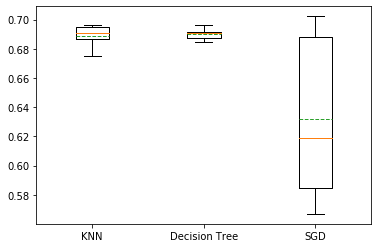

In [36]:
plt.boxplot(x=[knn_cv_scores_1, dt_cv_scores_1, sgd_cv_scores_1], labels=['KNN', 'Decision Tree', 'SGD'], meanline=True, showmeans=True)

Среднее значение качества больше у решающего дерева, наибольший доверительный интервал у SGD

**(0.5 балл) Задание 3.** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев: обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества деревьев разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании затруднительно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
estimators_count = 100
random_forest_clf_1 = RandomForestClassifier(n_estimators=estimators_count)
random_forest_clf_1.fit(features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
from sklearn.model_selection import cross_val_score

estimators = random_forest_clf_1.estimators_

rf_scores_1 = []
for j in range(1, estimators_count+1, 3):
    random_forest_clf_1.estimators_ = estimators[:j]
    cv_score = cross_val_score(random_forest_clf_1, features, target, cv=5).mean()
    rf_scores_1.append(cv_score)

Text(0, 0.5, 'CV score')

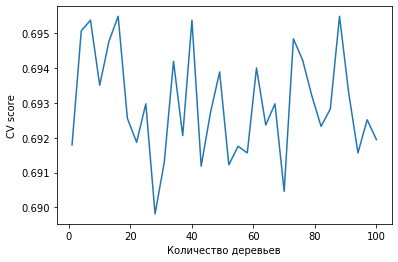

In [40]:
plt.plot(list(range(1, estimators_count+1, 3)), rf_scores_1)
plt.xlabel('Количество деревьев')
plt.ylabel('CV score')

Значения качества отличаются на тысячные, для дальнейшего исследования возьмем количество деревьев 100 (так как при этом количестве достигается максимум качества)

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**(1 балл) Задание 4.** Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

Значения признаков для игроков команд в таблице gold значительно больше, чем в таблице lh и test. Также можно заметить, что данные в таблице lh больше, чем в train (за исключением признака mid, который является идентификатором матча и не влияет на проигрыш/выигрыш команд). Это может повлиять на методы knn и SGD Linear Classifier. После масштабирования работа этих алгоритмов может измениться, так как при масштибировании могут (и скорее всего) измениться коэффициенты в векторе весов.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**(1 балл) Задание 5.** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество некоторых алгоритмов и почему?

In [41]:
from sklearn.preprocessing import scale

In [42]:
features_scaled = scale(features, axis=0)

###### KNN

In [43]:
neighbors = list(range(1,40))
param_grid = {'n_neighbors': neighbors}
knn_2 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_2.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
knn_2.best_params_, knn_2.best_score_

({'n_neighbors': 37}, 0.6890522626847478)

Результат: количество соседей увеличислось с 34 до 37, также увеличился best_score (средняя оценка на кросс-валидации). Это можно объяснить тем, что в методе измеряется расстояние между объектами и раньше оно могло быть намного больше из-за того, что некоторые признаки были намного больше других признаков. Сейчас же признаки отмасштибированы и расстояние изменилось.

#### Decision Tree

In [45]:
depths = list(range(1,16))
param_grid = {'max_depth': depths}
dt_clf_2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_clf_2.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
     

In [46]:
dt_clf_2.best_params_, dt_clf_2.best_score_

({'max_depth': 6}, 0.6900807557519427)

Результат: Не наблюдается различий с алгоритмом, который обучался на не масштабированных признаках. Можно объяснить тем, что в нем строятся решающие правила, а расстояние между объектами не учитываются

#### SGD Linear Classifier

In [47]:
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'loss': losses}
sgd_clf_2 = GridSearchCV(SGDClassifier(), param_grid, cv=5)
sgd_clf_2.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron']},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [48]:
sgd_clf_2.best_params_, sgd_clf_2.best_score_

({'loss': 'log'}, 0.6983467926253237)

Результат: Изменилась функция потерь с perceptron на логарифмическую, качество увеличилось примерно на 0.4. В линейном классификаторе веса могут на порядки отличаться друг от друга в случае, если признаки имеют разные порядки. При масштабировании мы от этого избавились.

#### Random Forest

In [49]:
estimators_count = 100
rf_clf_2 = RandomForestClassifier(n_estimators=estimators_count)
rf_clf_2.fit(features_scaled, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
estimators = rf_clf_2.estimators_

rf_scores_2 = []
for j in range(1, estimators_count+1, 3):
    rf_clf_2.estimators_ = estimators[:j]
    cv_score = cross_val_score(rf_clf_2, features_scaled, target, cv=5).mean()
    rf_scores_2.append(cv_score)

Text(0, 0.5, 'CV score')

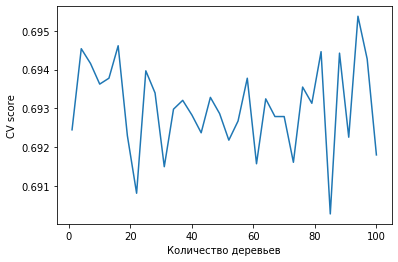

In [51]:
plt.plot(list(range(1, estimators_count+1, 3)), rf_scores_2)
plt.xlabel('Количество деревьев')
plt.ylabel('CV score')

Результат: Качество на масштабируемых признаках сильно не изменилось (в пределах тысячных), но изменилось число деревьев, на котором качество достигает своего максимума

**(1.5 балла) Задание 6.** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели".

Какой из алгоритмов имеет наилучшее качество? 

#### KNN

In [52]:
neighbors = list(range(1,40))
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
param_grid = {'n_neighbors': neighbors, 'metric': metric}
knn_3 = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_3.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
knn_3.best_params_, knn_3.best_score_

({'metric': 'manhattan', 'n_neighbors': 35}, 0.6896998323937223)

#### Decision Tree

In [54]:
depths = list(range(1,16))
criterion = ['gini', 'entropy']
param_grid = {'max_depth': depths, 'criterion': criterion}
dt_clf_3 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
dt_clf_3.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

In [55]:
dt_clf_3.best_params_, dt_clf_3.best_score_

({'criterion': 'entropy', 'max_depth': 6}, 0.6909568794758495)

#### SGD Linear Classifier

In [56]:
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l2', 'l1', 'elasticnet']
param_grid = {'loss': losses, 'penalty': penalty}
sgd_clf_3 = GridSearchCV(SGDClassifier(), param_grid, cv=5)
sgd_clf_3.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet']},


In [57]:
sgd_clf_3.best_params_, sgd_clf_3.best_score_

({'loss': 'log', 'penalty': 'elasticnet'}, 0.6999085783940271)

#### Random Forest

In [58]:
сriterion = ['gini', 'entropy']
max_features = [None, 'sqrt', 'log2']
param_grid = {'criterion': сriterion, 'max_features': max_features}
rf_clf_3 = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, cv=5)
rf_clf_3.fit(features_scaled, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [59]:
rf_clf_3.best_params_, rf_clf_3.best_score_

({'criterion': 'gini', 'max_features': 'log2'}, 0.694004266341612)

Лучшей моделью по оценки кросс валидации является SGD linear classifier. На масштабируемых признаках и при параметрах: loss='log', penalty='elasctisnet', получается оценка 0.7004037787597135

**(1.5 балла) Задание 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [60]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, title) -> None:
    train_sizes, train_scores, test_scores = learning_curve(estimator=estimator, X=X, y=y, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    import matplotlib.pyplot as plt
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label='train_scores')
    plt.plot(train_sizes, test_scores_mean, label='test_scores')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('CV score')
    plt.legend()

##### KNN

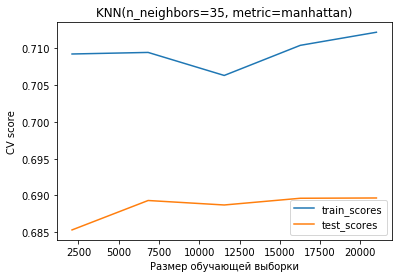

In [61]:
plot_learning_curve(estimator=KNeighborsClassifier(n_neighbors=35, metric='manhattan'),
                    X=features_scaled, y=target, cv=5, title='KNN(n_neighbors=35, metric=manhattan)')

#### Decision Tree

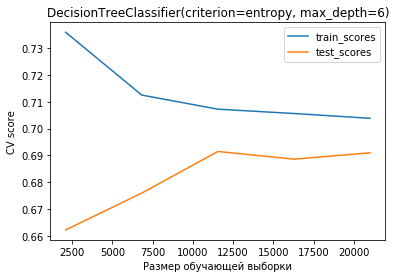

In [62]:
plot_learning_curve(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6),
                    X=features_scaled, y=target, cv=5, title='DecisionTreeClassifier(criterion=entropy, max_depth=6)')

#### SGD Linear Classifier

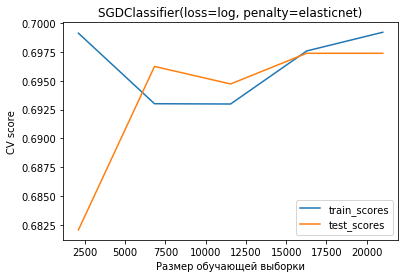

In [63]:
plot_learning_curve(estimator=SGDClassifier(loss='log', penalty='elasticnet'),
                    X=features_scaled, y=target, cv=5, title='SGDClassifier(loss=log, penalty=elasticnet)')

#### Random Forest

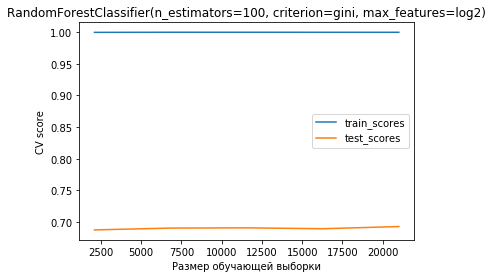

In [64]:
plot_learning_curve(estimator=RandomForestClassifier(n_estimators=100, criterion='gini', max_features='log2'),
                    X=features_scaled, y=target, cv=5, title='RandomForestClassifier(n_estimators=100, criterion=gini, max_features=log2)')

* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?  
Да, может. На тестовой выборке качество может убывать, так как появляются новые объекты. На обучающей выборке качество также может убывать (как например у решающего дерева, так как он склонен усложнять свою структуру дерева с ростом выборки).
* Для каких целей можно использовать знание качества на обучающей части выборки?  
Качество на обучающей части выборки можно использовать для обнаружения переобучения. Если качество на обучающей выборки сильно больше, чем на тестовой, то можно сказать, что алгоритм переобучился (подогнался под данные ищ обучающей выборки)
* Какой из алгоритмов лучше обучается на меньшем числе объектов?  
Если сравнивать оценки качества на тестовой и обучающей выборках, можно отметить, что лучше всего обучился SGD, так как в отличие от других алгоритмах он не является переобученным
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?  
Вполне возможно, что по результатам качества на тестовой и обучающей выборках, можно улучшить SGD

### (2 балла) Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла) Задание 8.** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. В этом файле для каждой игры дан список героев. Напоминаем, что player_{0,1,2,3,4} – игроки команды radiant, player_{5,6,7,8,9} – игроки команды dire. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [65]:
heroes_csv = pd.read_csv('heroes.csv')
heroes_csv.head(5)

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,31,32,29,39,52,9,79,28,21,33
1,1,53,39,29,10,79,41,55,40,74,33
2,2,33,17,21,53,20,62,74,55,65,40
3,3,33,40,74,60,38,52,16,21,79,80
4,4,31,16,9,74,33,52,1,21,3,38


In [66]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
encoding = ohe.fit_transform(heroes_csv.iloc[:, 1:].values)

/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [67]:
encoding.shape

(81469, 1190)

In [68]:
heroes_data = pd.DataFrame(encoding)
heroes_data['mid'] = heroes_csv['mid']
heroes_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1181,1182,1183,1184,1185,1186,1187,1188,1189,mid
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [69]:
train_data_update.iloc[:,3:] = features_scaled

In [70]:
train_data_update

,mid,radiant_win,time,patch,radiant_gold_sum,radiant_gold_min,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,radiant_lh_sum,radiant_lh_min,radiant_lh_max,dire_lh_sum,dire_lh_min,dire_lh_max
0,48434,True,600,-0.464125,-1.277413,-0.740157,-0.568303,-2.294506,-1.850932,-1.614908,-0.601332,-0.647336,-0.102443,-1.668883,-1.259294,-0.735268
1,37074,False,600,-1.134477,-0.762193,-0.677343,0.070486,0.166611,-0.097827,-0.208532,-1.122770,0.532343,-0.177424,1.002049,1.046496,0.520836
4,69147,False,600,1.068107,-1.180979,-1.452059,-0.785492,0.437161,0.592323,-0.305016,0.246004,-1.237176,0.947291,0.519350,0.758273,0.373059
5,33300,True,600,-1.326006,0.738502,0.743469,0.129574,0.368689,0.148655,1.112808,-0.470973,0.532343,-0.777272,0.648070,-0.106399,2.220272
7,65872,False,600,0.972343,1.143202,0.073444,1.899021,0.991066,-0.849598,4.857694,1.191110,0.237423,2.596873,1.002049,-0.682846,2.368049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40728,41993,True,600,-1.038713,2.315585,-0.429074,2.651196,-0.232534,0.721726,0.303324,0.441543,-0.942256,0.347443,-0.092068,2.487615,-1.104711
40730,45891,False,600,-0.559890,-0.437674,0.118312,-0.884504,-0.239771,0.034657,-0.038458,0.539313,2.006943,0.047519,-0.285147,-0.682846,-0.365826
40731,42613,False,600,-0.942948,-1.344051,-0.560686,-1.686185,0.745566,1.233177,-0.448924,-0.927231,-0.942256,-1.077196,0.390631,1.334720,-0.735268
40732,43567,False,600,-0.847184,-0.161373,0.450333,-0.509215,0.717732,-0.279608,-0.030282,0.017875,2.006943,-0.927234,0.873329,-1.259294,0.373059


In [71]:
train_data_update = train_data_update.join(heroes_data.set_index('mid'), how='inner', on='mid')

In [72]:
train_data_update

,mid,radiant_win,time,patch,radiant_gold_sum,radiant_gold_min,radiant_gold_max,dire_gold_sum,dire_gold_min,dire_gold_max,...,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189
0,48434,True,600,-0.464125,-1.277413,-0.740157,-0.568303,-2.294506,-1.850932,-1.614908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37074,False,600,-1.134477,-0.762193,-0.677343,0.070486,0.166611,-0.097827,-0.208532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69147,False,600,1.068107,-1.180979,-1.452059,-0.785492,0.437161,0.592323,-0.305016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,33300,True,600,-1.326006,0.738502,0.743469,0.129574,0.368689,0.148655,1.112808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,65872,False,600,0.972343,1.143202,0.073444,1.899021,0.991066,-0.849598,4.857694,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40728,41993,True,600,-1.038713,2.315585,-0.429074,2.651196,-0.232534,0.721726,0.303324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40730,45891,False,600,-0.559890,-0.437674,0.118312,-0.884504,-0.239771,0.034657,-0.038458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40731,42613,False,600,-0.942948,-1.344051,-0.560686,-1.686185,0.745566,1.233177,-0.448924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40732,43567,False,600,-0.847184,-0.161373,0.450333,-0.509215,0.717732,-0.279608,-0.030282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**(1.5 балла) Задание 9.** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Для SGDClassifier подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

Добавление к масштабированным признакам закодированные категориальные признаки было сдлелано в предыдущем (8) пункте

In [73]:
feature_update_2 = train_data_update.iloc[:, 3:].values

In [74]:
target_update_2 =[int(y) for y in train_data_update.iloc[:, 1].values]

In [75]:
feature_update_2

array([[-0.46412537, -1.27741331, -0.74015735, ...,  0.        ,
         0.        ,  0.        ],
       [-1.1344772 , -0.76219292, -0.67734251, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06810739, -1.18097879, -1.4520589 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.9429481 , -1.34405065, -0.56068638, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84718355, -0.16137334,  0.45033347, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06810739,  0.57001208,  0.25889776, ...,  0.        ,
         0.        ,  0.        ]])

In [76]:
feature_update_2.shape

(26252, 1203)

#### KNN

In [77]:
knn_4 = KNeighborsClassifier(n_neighbors=35, metric='manhattan')
knn_cv_scores_4 = cross_val_score(knn_4, feature_update_2, target, cv=5)
knn_score_4 = knn_cv_scores_4.mean()

In [78]:
print(knn_score_4)

0.6869957133304998


#### Decision Tree

In [79]:
dt_clf_4 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt_cv_scores_4 = cross_val_score(dt_clf_4, feature_update_2, target, cv=5)
dt_score_4 = dt_cv_scores_4.mean()

In [80]:
print(dt_score_4)

0.6898526095309012


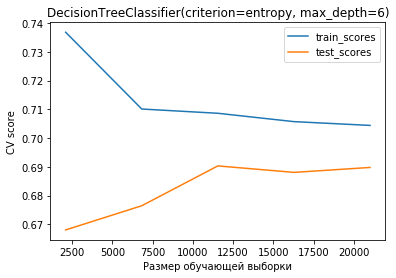

In [81]:
plot_learning_curve(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6),
                    X=feature_update_2, y=target, cv=5, title='DecisionTreeClassifier(criterion=entropy, max_depth=6)')

#### SGD

In [82]:
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
penalty = ['l2', 'l1', 'elasticnet']
param_grid = {'loss': losses, 'penalty': penalty}
sgd_clf_4 = GridSearchCV(SGDClassifier(), param_grid, cv=5)
sgd_clf_4.fit(feature_update_2, target)

/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_ite

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet']},


In [83]:
sgd_clf_4.best_params_, sgd_clf_4.best_score_

({'loss': 'log', 'penalty': 'l1'}, 0.7053176900807557)

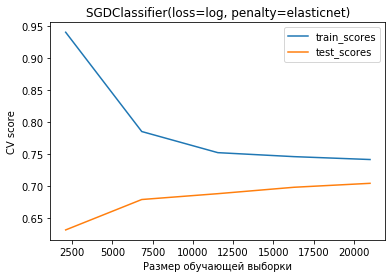

In [84]:
plot_learning_curve(estimator=SGDClassifier(loss='log', penalty='elasticnet'),
                    X=feature_update_2, y=target, cv=5, title='SGDClassifier(loss=log, penalty=elasticnet)')

#### Random Forest

In [85]:
rf_clf_4 = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='log2')
rf_cv_scores_4 = cross_val_score(rf_clf_4, feature_update_2, target, cv=5)
rf_score_4 = rf_cv_scores_4.mean()

In [86]:
print(rf_score_4)

0.6944999530046414


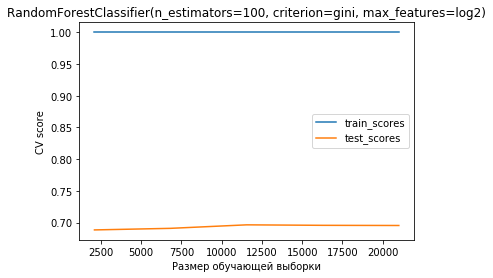

In [87]:
plot_learning_curve(estimator=RandomForestClassifier(n_estimators=100, criterion='gini', max_features='log2'),
                    X=feature_update_2, y=target, cv=5, title='RandomForestClassifier(n_estimators=100, criterion=gini, max_features=log2)')

Как и прежде лучшим по качеству является SGD classifier, однако добавление категориальных признаков привело к переобучению, наилучшее качество достгается также на тех же самых парамаетрах, которые были найдены выше. Все остальные модели также переобучены.

### (3 балла) Смешивание моделей (blending)

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(2 балла) Задание 10.**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [88]:
feature_update_2

array([[-0.46412537, -1.27741331, -0.74015735, ...,  0.        ,
         0.        ,  0.        ],
       [-1.1344772 , -0.76219292, -0.67734251, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06810739, -1.18097879, -1.4520589 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.9429481 , -1.34405065, -0.56068638, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84718355, -0.16137334,  0.45033347, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06810739,  0.57001208,  0.25889776, ...,  0.        ,
         0.        ,  0.        ]])

In [89]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
from sklearn.utils import check_X_y
from sklearn.utils.multiclass import unique_labels


class my_clf(BaseEstimator):
    
    def __init__(self, clf1=SGDClassifier(), clf2=DecisionTreeClassifier(), alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = unique_labels(y)
        
        self.X_ = X
        self.y_ = y

        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        return self
    
    def predict_proba(self, X, cheсk=False):
        proba1 = self.clf1.predict_proba(X)
        proba2 = self.clf2.predict_proba(X)
        return np.array(proba1) * self.alpha + np.array(proba2) * (1 - self.alpha)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return [int (x > 0.5) for x in proba]
    
    def get_params(self, deep=True):
        return {'clf1': self.clf1, 'clf2': self.clf2, 'alpha': self.alpha}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def score(self, X, y):
        return roc_auc_score(y, self.predict_proba(X)[:,1])

**(1 балл) Задание 11.** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [90]:
alpha = list(np.linspace(0,1,5))
new_clf = GridSearchCV(my_clf(SGDClassifier(loss='log', penalty='elasticnet'), RandomForestClassifier(n_estimators=100, criterion='gini', max_features='log2')), param_grid={'alpha': alpha}, cv=5)
new_clf.fit(np.array(feature_update_2), np.array(target))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=my_clf(alpha=0.5,
                              clf1=SGDClassifier(alpha=0.0001, average=False,
                                                 class_weight=None,
                                                 early_stopping=False,
                                                 epsilon=0.1, eta0=0.0,
                                                 fit_intercept=True,
                                                 l1_ratio=0.15,
                                                 learning_rate='optimal',
                                                 loss='log', max_iter=1000,
                                                 n_iter_no_change=5,
                                                 n_jobs=None,
                                                 penalty='elasticnet',
                                                 power_t=0.5, random_state=None,
                                                 shu

In [91]:
new_clf.best_score_, new_clf.best_params_

(0.7853442786349731, {'alpha': 0.5})

In [92]:
new_clf.best_index_

2

In [93]:
my_clf_cv_results = new_clf.cv_results_
my_clf_best_index = new_clf.best_index_
my_clf_cv_scores = [my_clf_cv_results['split0_test_score'][my_clf_best_index], my_clf_cv_results['split1_test_score'][my_clf_best_index], 
                    my_clf_cv_results['split2_test_score'][my_clf_best_index], my_clf_cv_results['split3_test_score'][my_clf_best_index],
                    my_clf_cv_results['split4_test_score'][my_clf_best_index]]

## (2 балла) Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**(2 балла) Задание 12.** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Наилучшим среди KNN является knn_3 на масштабируемых признаках без добавления категориальных признаков ('metric': 'manhattan', 'n_neighbors': 35),  
для решающего дерева буквально на тысяные лучшим являестя алгоритм, обученный на масштабируемых признаках без добавления категориальных признаков ('criterion': 'entropy', 'max_depth': 6),  
для SGD-на масштабируемых признаках с добавлением категориальных признаков ('loss': 'log', 'penalty': 'elasticnet'),  
для случайного леса лучше всего алгоритм, обученный на масштабируемых признаках с добавлением категориальных признаков, однако значение отличается на тысячную от других случайных лесов (n_estimators=100, criterion='gini', max_features='log2')

In [94]:
knn_cv_results_3 = knn_3.cv_results_
knn_3_best_index = knn_3.best_index_
knn_3_cv_scores = [knn_cv_results_3['split0_test_score'][knn_3_best_index], knn_cv_results_3['split1_test_score'][knn_3_best_index], 
                    knn_cv_results_3['split2_test_score'][knn_3_best_index], knn_cv_results_3['split3_test_score'][knn_3_best_index],
                    knn_cv_results_3['split4_test_score'][knn_3_best_index]]

In [95]:
dt_cv_results_3 = dt_clf_3.cv_results_
dt_3_best_index = dt_clf_3.best_index_
dt_3_cv_scores = [dt_cv_results_3['split0_test_score'][dt_3_best_index], dt_cv_results_3['split1_test_score'][dt_3_best_index], 
                    dt_cv_results_3['split2_test_score'][dt_3_best_index], dt_cv_results_3['split3_test_score'][dt_3_best_index],
                    dt_cv_results_3['split4_test_score'][dt_3_best_index]]

In [96]:
sgd_cv_results_4 = sgd_clf_4.cv_results_
sgd_4_best_index = sgd_clf_4.best_index_
sgd_4_cv_scores = [sgd_cv_results_4['split0_test_score'][sgd_4_best_index], sgd_cv_results_4['split1_test_score'][sgd_4_best_index], 
                    sgd_cv_results_4['split2_test_score'][sgd_4_best_index], sgd_cv_results_4['split3_test_score'][sgd_4_best_index],
                    sgd_cv_results_4['split4_test_score'][sgd_4_best_index]]

{'whiskers': [<matplotlib.lines.Line2D at 0x1a485522d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a48552d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a4854b5d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a48558790>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a48558c90>,
 'means': []}

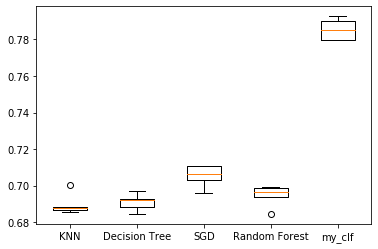

In [97]:
plt.boxplot(x=[knn_3_cv_scores, dt_3_cv_scores, sgd_4_cv_scores, rf_cv_scores_4, my_clf_cv_scores], labels=['KNN', 'Decision Tree', 'SGD', 'Random Forest', 'my_clf'])

Можно сказать, что лучшим алгоритмом по качеству будет SGD, однако у него слишком большой доверительный интервал относительно других алгоритмов. Однако даже его нижняя граница будет выше, чем верхняя граница остальных алгоритов.  
Оказалось, что SGD и случайный лес работает лучше всего вместе с категориальными признаками, а KNN и решающее дерево без них. Однако все 4 алгоритма нужно обучать на масштабируемых признаках.
Для каждого алгоритма были подобраны свои метрики. Ясно, что у каждой модели есть свои гиперпараметры, но даже для похожих алгоритов (случайный лес(основан на решающих деревьях) и решающее дерево) такой гиперпараметр, как критерий разбиения, различается

Не забудьте воспользоваться всеми полученными наработками. Отправьте результаты предсказаний ваших моделей для матчей из test.csv в соревнование на [kaggle](https://www.kaggle.com/t/55797188147b4b519023923730aa5545). Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.